<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Support Vector Machine Model

### Initializations

In [1]:
# benötigte Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Support Vector Machine

In [5]:
# Support Vector Machine initialisieren
svm = SVC()
svm.fit(X_train_scaled, y_train)

In [8]:
# Score berechnen
svm.score(X_test_scaled, y_test)

0.8075

In [9]:
# Confusion Matrix und Classification Report erstellen
predictions = svm.predict(X_test_scaled)

In [11]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1506   30]
 [ 355  109]]


In [10]:
# Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, svm.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.80675
Test Accuracy  ::  0.8075


In [12]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [13]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1506,   30],
       [ 355,  109]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [14]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.98      0.89      1536
          1       0.78      0.23      0.36       464

avg / total       0.80      0.81      0.76      2000



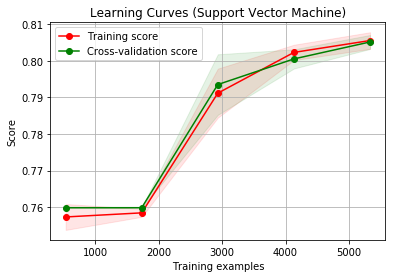

In [15]:
# Learning Curve berechnen
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Support Vector Machine w/o Department

In [24]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [25]:
# Decision Tree initialisieren
svm = SVC()

In [26]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Score berechnen
svm.score(X_test_scaled, y_test)

0.88500000000000001

In [28]:
# Confusion Matrix erstellen
predictions = svm.predict(X_test_scaled)

In [29]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1479   57]
 [ 173  291]]


In [30]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1506,   30],
       [ 355,  109]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [31]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1479,   57],
       [ 173,  291]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [32]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1536
          1       0.84      0.63      0.72       464

avg / total       0.88      0.89      0.88      2000



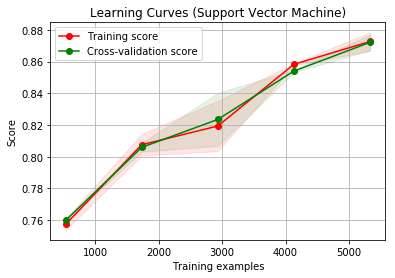

In [33]:
# Learning Curve berechnen
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

In [34]:
# Importieren weiterer Bibliotheken
from sklearn.model_selection import GridSearchCV

In [35]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [36]:
# Support Vector Machine initialisieren
svm = SVC()

In [37]:
# zu testende Parameter vorgeben
param_space = {'kernel':[ 'poly', 'rbf', 'sigmoid'], 'degree':[1,3,5,10,20]}

In [38]:
# Grid Search Crossvalidation definieren 
gs = GridSearchCV(svm, param_space, cv=5, n_jobs=-1)

In [39]:
# Modelle erstellen
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 'degree': [1, 3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


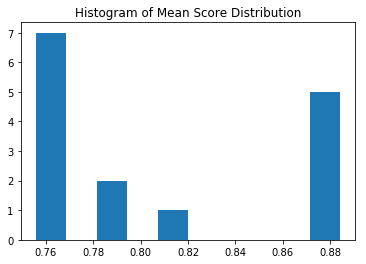

In [40]:
# Histogramm erstellen
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [41]:
# besten Modellscore ausgeben
gs.best_score_

0.88424999999999998

In [42]:
# beste Parameterkombination ausgeben
gs.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [43]:
# Decision Tree mit bester Parameterkombination initialisieren
svm = SVC(kernel='rbf') 

In [44]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# Score ausgeben
svm.score(X_test_scaled, y_test)

0.88500000000000001

In [46]:
# Confusion Matrix erstellen
predictions = svm.predict(X_test_scaled)

In [47]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1479   57]
 [ 173  291]]


In [48]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1479,   57],
       [ 173,  291]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [49]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1479,   57],
       [ 173,  291]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [50]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1536
          1       0.84      0.63      0.72       464

avg / total       0.88      0.89      0.88      2000



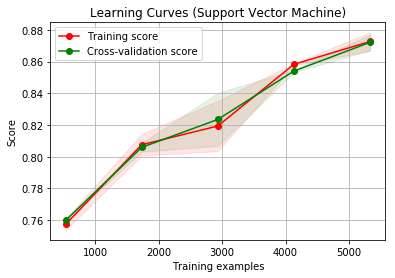

In [51]:
# Learning Curve berechnen
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Support Vector Machine w/o Department and Salary

In [52]:
# Laden der Trainings- und Testdaten ohne das Feature Department und Salary
X = np.load(file='exchange/hr_06_X_wodeptsal.npy')
X_train = np.load(file='exchange/hr_06_X_wodeptsal_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodeptsal_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodeptsal_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodeptsal_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodeptsal.npy')
y_train = np.load(file='exchange/hr_06_y_wodeptsal_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodeptsal_test.npy')

In [56]:
# Support Vector Machine initialisieren
svm = SVC()

In [57]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
# Score berechnen
svm.score(X_test_scaled, y_test)

0.89349999999999996

In [59]:
# Confusion Matrix und Classification Report erstellen
predictions = clf.predict(X_test_scaled)

In [60]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1470   66]
 [ 147  317]]


In [61]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1479,   57],
       [ 173,  291]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [62]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1470,   66],
       [ 147,  317]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [63]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1536
          1       0.83      0.68      0.75       464

avg / total       0.89      0.89      0.89      2000



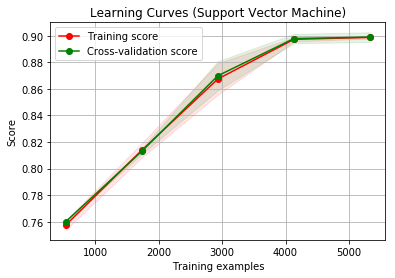

In [64]:
# Learning Curve berechnen
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

In [65]:
# Rausnehmen der Salary-Spalte hat geholfen

### Feature Selection for Support Vector Machine

In [66]:
# weitere Bibliotheken importieren
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [68]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


In [69]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [70]:
# Features in List umwandeln und ausgeben
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [71]:
# Länge der Liste
len(columns)

9

In [72]:
# Anzahl der Kombinationen, wenn 0, 1, 2, 3 oder 4 Features rausnimmt
for i in range(0,4):
    print(len(set(it.combinations(columns,i))))

1
9
36
84


In [73]:
# Kombination der Features, die nicht berücksichtigt werden und Ausgabe der Scores 
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf = SVC()
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination     score
0      workAccident,department,salary,hasLeftCompany  0.914376
0      gotPromotion,department,salary,hasLeftCompany  0.911251
0  satisfactionLevel,department,salary,hasLeftCom...  0.904626
0  workAccident,gotPromotion,department,hasLeftCo...  0.904251
0                   department,salary,hasLeftCompany  0.899501


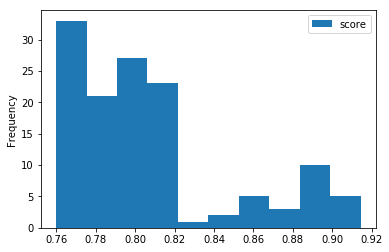

In [74]:
# Ausgabe der Scores als Diagramm
results.plot.hist();

In [75]:
# Ausgabe der kombinierten Features sortiert nach Score - besten Kombinationen
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"workAccident,department,salary,hasLeftCompany",0.914376
0,"gotPromotion,department,salary,hasLeftCompany",0.911251
0,"satisfactionLevel,department,salary,hasLeftCom...",0.904626
0,"workAccident,gotPromotion,department,hasLeftCo...",0.904251
0,"department,salary,hasLeftCompany",0.899501
0,"workAccident,department,hasLeftCompany",0.898125
0,"yearsAtCompany,workAccident,department,hasLeft...",0.896126
0,"yearsSinceEvaluation,department,salary,hasLeft...",0.894627
0,"gotPromotion,department,hasLeftCompany",0.894376
0,"yearsAtCompany,department,salary,hasLeftCompany",0.894250


In [76]:
# Ausgabe der ignorierten kombinierten Features sortiert nach Score - schlechtesten Kombinationen
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"satisfactionLevel,yearsSinceEvaluation,average...",0.759875
0,"satisfactionLevel,yearsSinceEvaluation,numberO...",0.759875
0,"satisfactionLevel,yearsSinceEvaluation,workAcc...",0.759875
0,"satisfactionLevel,averageMonthlyHours,yearsAtC...",0.759875
0,"satisfactionLevel,yearsSinceEvaluation,salary,...",0.759875
0,"satisfactionLevel,averageMonthlyHours,gotPromo...",0.759875
0,"satisfactionLevel,numberOfProjects,hasLeftCompany",0.759875
0,"satisfactionLevel,yearsSinceEvaluation,hasLeft...",0.759875
0,"satisfactionLevel,averageMonthlyHours,hasLeftC...",0.759875
0,"satisfactionLevel,numberOfProjects,averageMont...",0.759875


In [77]:
# Features mit geringem Einfluss auf Modell rausnehmen und Trainings- und Testdataframes erstellen
df = pd.get_dummies(dff.drop(['workAccident','department','salary','hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
y = df['hasLeftCompany'].values
X = df.drop(['hasLeftCompany'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# Support Vector Machine mit bester Parameterkombination (default) initialisieren
clf = SVC()

In [79]:
clf.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.91349999999999998

In [81]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [83]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1471   65]
 [ 108  356]]


In [82]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.922125
Test Accuracy  ::  0.9135


In [84]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1470,   66],
       [ 147,  317]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [85]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1525,   11],
       [  24,  440]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [86]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1536
          1       0.85      0.77      0.80       464

avg / total       0.91      0.91      0.91      2000



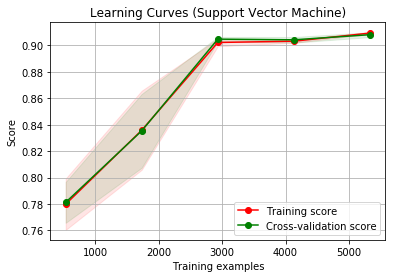

In [87]:
# Learning Curve berechnen
title = 'Learning Curves (Support Vector Machine)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()